### Дарабіць:

- для калонак 
  ```
  new_electors, ballots,
  early_voters, home_voters, pp_voters,
  agains_all, spoilt
  ```
  падлічыць долю адносна ўсіх выбарцаў.
  правесці аналіз для атрыманых доляў.

- даследаваць размеркаванне `ballots - voted_n`
- даследаваць размеркаванне `electors - ballots`

### imports

In [1]:
import os
from IPython.display import display

import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import seaborn as sns
sns.set(font_scale=1.1)

import qgrid
from qgrid import show_grid as sg
qgrid.set_grid_option('forceFitColumns', False)
qgrid.set_grid_option('defaultColumnWidth', 180)
qgrid.set_defaults(show_toolbar=True)

### read the dataset

In [2]:
fp = os.path.join('..', 'data', 'output', 'Vybary_2015.csv')
df = pd.read_csv(fp)
df

,region,district,district_type,H_n,H_%,K_n,K_%,L_n,L_%,U_n,U_%,electors,new_electors,ballots,voted_n,voted_%,early_voters,home_voters,pp_voters,against_all,spoilt
0,г. Менск,Завадскі,раён гораду,4428,3.64,9221,7.58,75931,62.42,3966,3.26,166138,465,121646,121639,73.22,48601,837,72201,27414,679
1,г. Менск,Ленінскі,раён гораду,4068,3.37,9952,8.24,77753,64.34,3451,2.86,165567,713,120995,120844,72.99,43996,2796,74052,25263,357
2,г. Менск,Маскоўскі,раён гораду,4753,3.21,9472,6.40,99879,67.50,3731,2.52,198655,376,148082,147972,74.49,60939,1791,85242,29289,848
3,г. Менск,Кастрычніцкі,раён гораду,3077,3.36,6569,7.17,61000,66.62,2365,2.58,124966,5,91631,91566,73.27,33855,962,56749,18165,390
4,г. Менск,Партызанскі,раён гораду,1870,3.79,3868,7.83,30542,61.85,1598,3.24,67502,109,49385,49379,73.15,19231,2164,27984,10914,587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Рэспубліка,Гарадзенская вобласць. Агулам,Агулам,15691,2.27,32755,4.75,592490,85.89,7092,1.03,779638,2105,689841,689824,88.48,286439,64395,338990,34169,7627
157,Рэспубліка,Менская вобласць. Агулам,Агулам,32128,3.21,44155,4.41,858287,85.74,21763,2.17,1116445,2019,1001107,1001041,89.66,412680,97707,490654,37552,7156
158,Рэспубліка,Магілёўская вобласць. Агулам,Агулам,27173,3.66,25652,3.46,655396,88.30,7928,1.07,816030,1420,742575,742263,90.96,298268,59198,384797,19443,6671
159,Рэспубліка,г. Менск. Агулам,Агулам,32585,3.33,69134,7.07,642119,65.69,26628,2.72,1314164,3807,978800,977448,74.38,384285,20561,572602,199056,7926


## Рэзультаты выбараў 2015

In [3]:
reverse_colnames_map = {
    'region': 'Вобласць',
    'district': 'Раён',
    'district_type': 'Тып раёну',
    'H_n': 'Гайдукевіч, N',
    'H_%': 'Гайдукевіч, %',
    'K_n': 'Караткевіч, N',
    'K_%': 'Караткевіч, %',
    'L_n': 'Лукашэнка, N',
    'L_%': 'Лукашэнка, %',
    'U_n': 'Улаховіч, N',
    'U_%': 'Улаховіч, %',
    'electors': 'выбарцы агулам',
    'new_electors': 'новыя выбарцы',
    'ballots': 'атрыманыя бюлетэні',
    'voted_n': 'прынялі, N',
    'voted_%': 'прынялі, %',
    'early_voters': 'датэрмінова',
    'home_voters': 'па месцы знаходжання',
    'pp_voters': 'на ўчастку',
    'against_all': 'супраць усіх',
    'spoilt': 'несапраўдныя бюлетэні'
}

In [4]:
res = df.query('district == "Рэспубліка. Агулам"')
res.columns = res.columns.map(reverse_colnames_map)
res.T

,160
Вобласць,Рэспубліка
Раён,Рэспубліка. Агулам
Тып раёну,Агулам
"Гайдукевіч, N",201945
"Гайдукевіч, %",3.3
"Караткевіч, N",271426
"Караткевіч, %",4.44
"Лукашэнка, N",5102478
"Лукашэнка, %",83.47
"Улаховіч, N",102131


## Аналіз

* Выдаляем радкі з агрэгаванымі дадзенымі па абласцях і па рэспубліцы

In [5]:
df = df.query('district_type != "Агулам"').copy()
df.shape

(146, 21)

## Графікі долі галасоў за кандыдатаў адносна яўкі на ўчастак

In [6]:
candidates_map = {
    'H': 'Губарэвіч', 
    'K': 'Караткевіч', 
    'L': 'Лукашэнка', 
    'U': 'Улаховіч'
}

* melt `'H_%', 'K_%', 'L_%', 'U_%'` columns to use seaborn.FacetGrid plots

In [7]:
df_melted = df.melt(
    id_vars=['district', 'voted_%', 'district_type', 'region'], 
    value_vars=['H_%', 'K_%', 'L_%', 'U_%'],
    var_name='candidate', value_name='candidate_%'
)
assert not df_melted.duplicated().any()

df_melted['candidate'] = df_melted['candidate'].str[:-2].map(candidates_map)

df_melted

,district,voted_%,district_type,region,candidate,candidate_%
0,Завадскі,73.22,раён гораду,г. Менск,Губарэвіч,3.64
1,Ленінскі,72.99,раён гораду,г. Менск,Губарэвіч,3.37
2,Маскоўскі,74.49,раён гораду,г. Менск,Губарэвіч,3.21
3,Кастрычніцкі,73.27,раён гораду,г. Менск,Губарэвіч,3.36
4,Партызанскі,73.15,раён гораду,г. Менск,Губарэвіч,3.79
...,...,...,...,...,...,...
579,Чачэрскі,97.50,раён,Гомельская вобласць,Улаховіч,0.47
580,Чыгуначны раён г. Гомелю,84.14,раён гораду,Гомельская вобласць,Улаховіч,2.91
581,Навабеліцкі раён г. Гомелю,86.98,раён гораду,Гомельская вобласць,Улаховіч,2.23
582,Савецкі раён г. Гомелю,83.62,раён гораду,Гомельская вобласць,Улаховіч,2.48


* Графік долі галасоў ад яўкі. Колеры адпавядаюць тыпу ўчастку

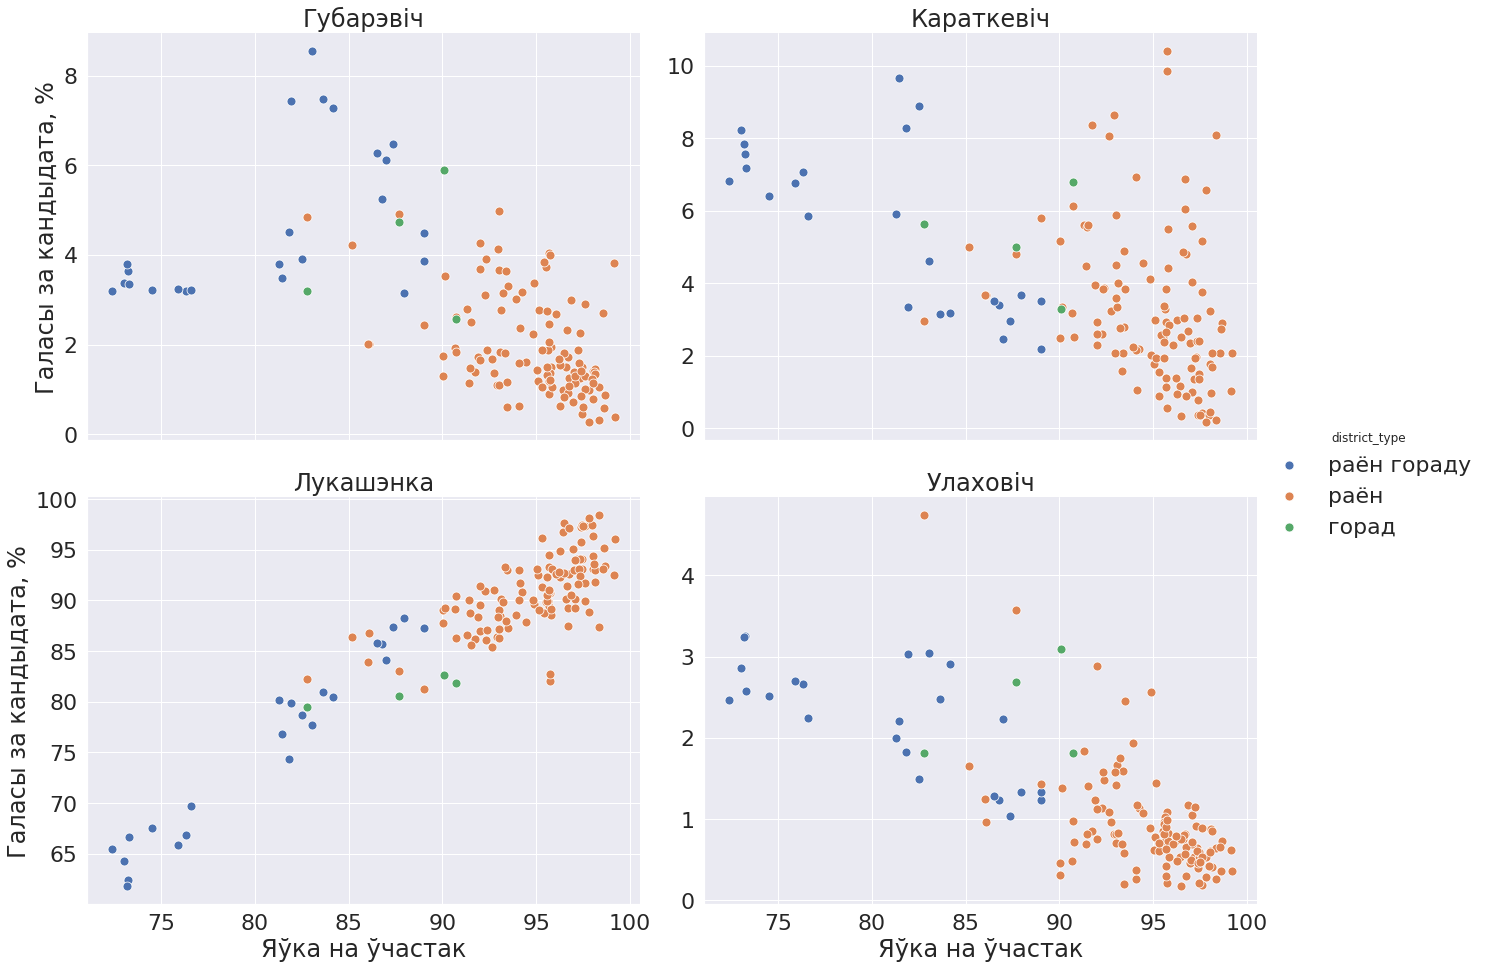

In [8]:
sns.set(font_scale=2)

grid = sns.FacetGrid(
    df_melted, col='candidate', hue='district_type', 
    col_wrap=2, sharey=False, height=7, aspect=1.3,
)
scatter_plots = grid.map(sns.scatterplot, 'voted_%', 'candidate_%', s=80)

scatter_plots.set_titles('{col_name}')
scatter_plots.set_ylabels('Галасы за кандыдата, %')
scatter_plots.set_xlabels('Яўка на ўчастак')
scatter_plots.add_legend();

scatter_plots.savefig('votes_vs_turnout_by_district_type.png');

* Графік долі галасоў ад яўкі. Колеры адпавядаюць абласцям

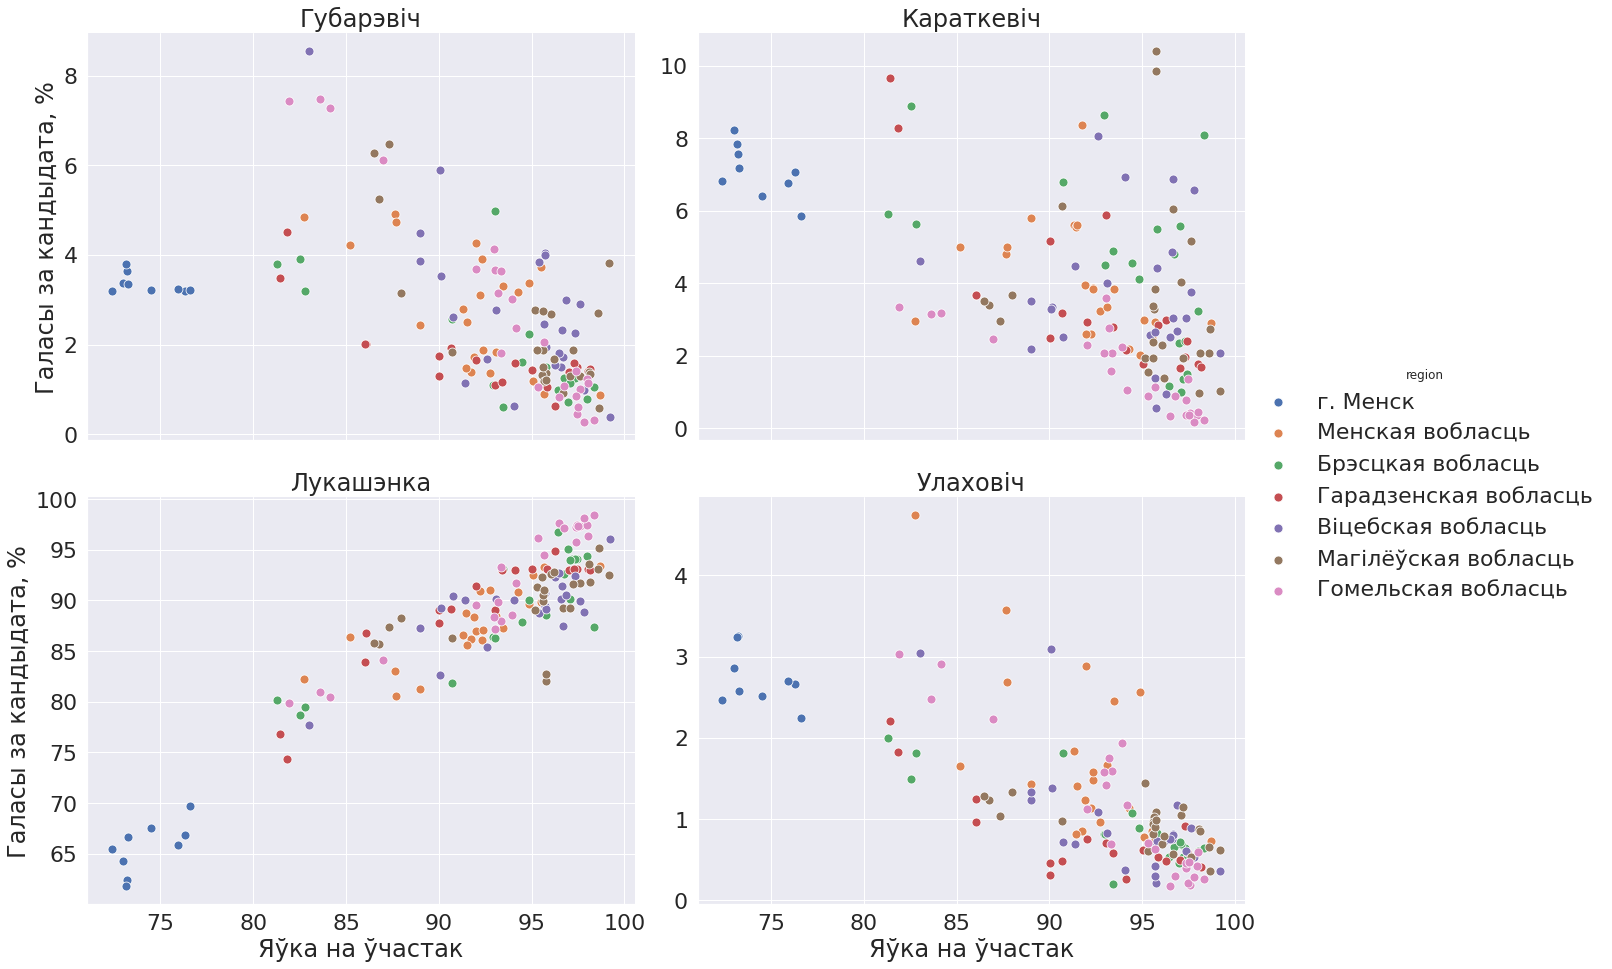

In [9]:
sns.set(font_scale=2)

grid = sns.FacetGrid(
    df_melted, col='candidate', hue='region', 
    col_wrap=2, sharey=False, height=7, aspect=1.3,
)
scatter_plots = grid.map(sns.scatterplot, 'voted_%', 'candidate_%', s=80)

scatter_plots.set_titles('{col_name}')
scatter_plots.set_ylabels('Галасы за кандыдата, %')
scatter_plots.set_xlabels('Яўка на ўчастак')
scatter_plots.add_legend()

scatter_plots.savefig('votes_vs_turnout_by_region.png');

* reset `font_scale`

In [10]:
sns.set(font_scale=1.1)

## Размеркаванне яўкі

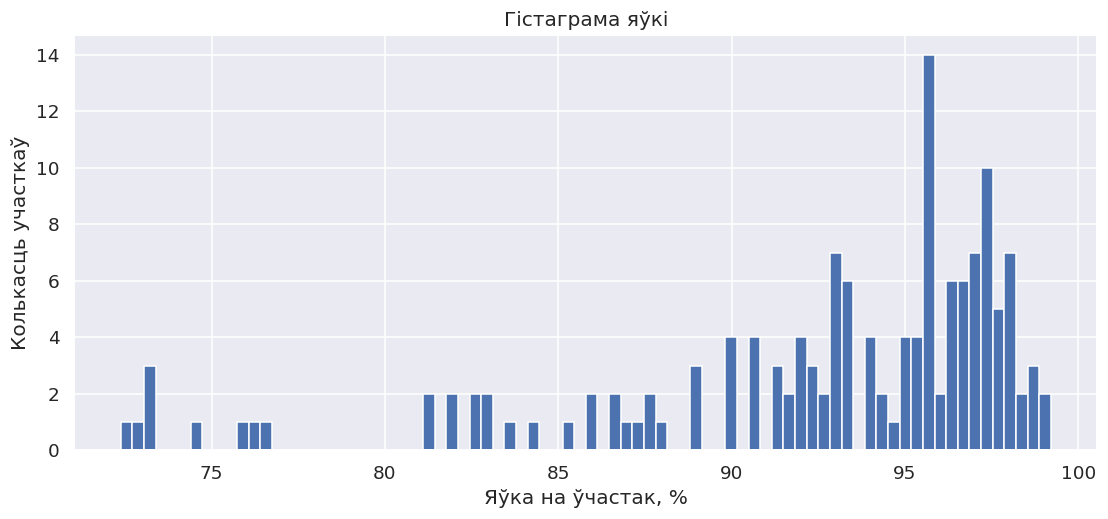

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5), dpi=110)
ax.hist(df['voted_%'], bins=80)
ax.set_xlabel('Яўка на ўчастак, %')
ax.set_ylabel('Колькасць участкаў')
ax.set_title('Гістаграма яўкі');

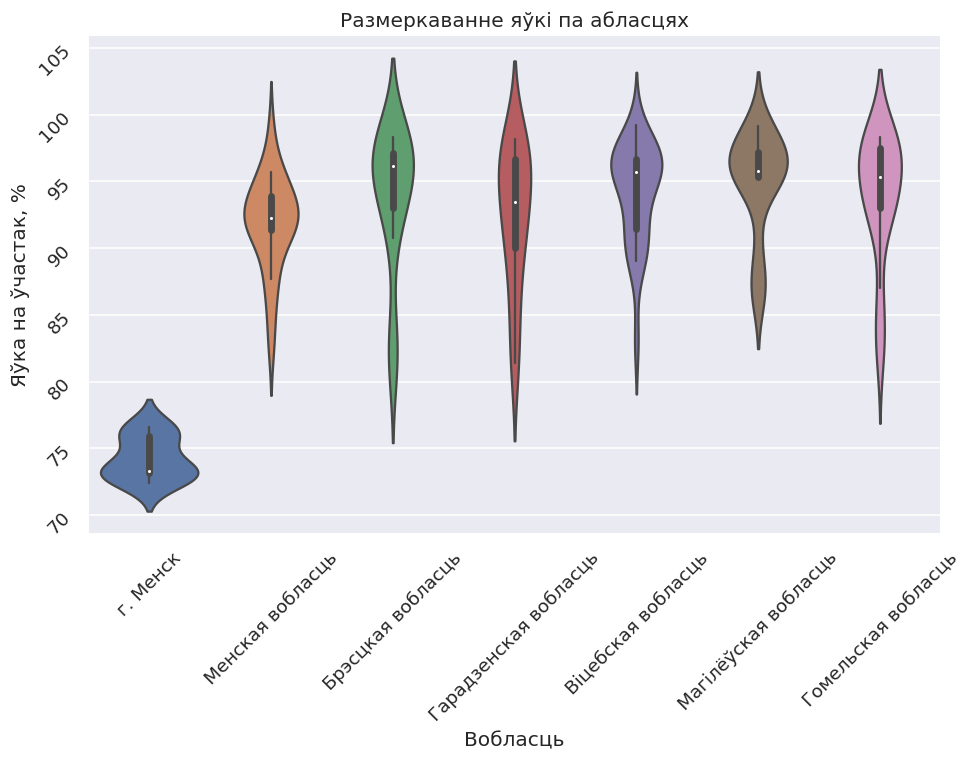

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=110)
sns.violinplot(y='voted_%', x='region', data=df, ax=ax)
ax.set_ylabel('Яўка на ўчастак, %')
ax.set_xlabel('Вобласць')
ax.tick_params(rotation=45)
ax.set_title('Размеркаванне яўкі па абласцях');

In [13]:
df['in_city'] = 'Горад'
df.loc[df['district_type'] == 'раён', 'in_city'] = 'Не горад'

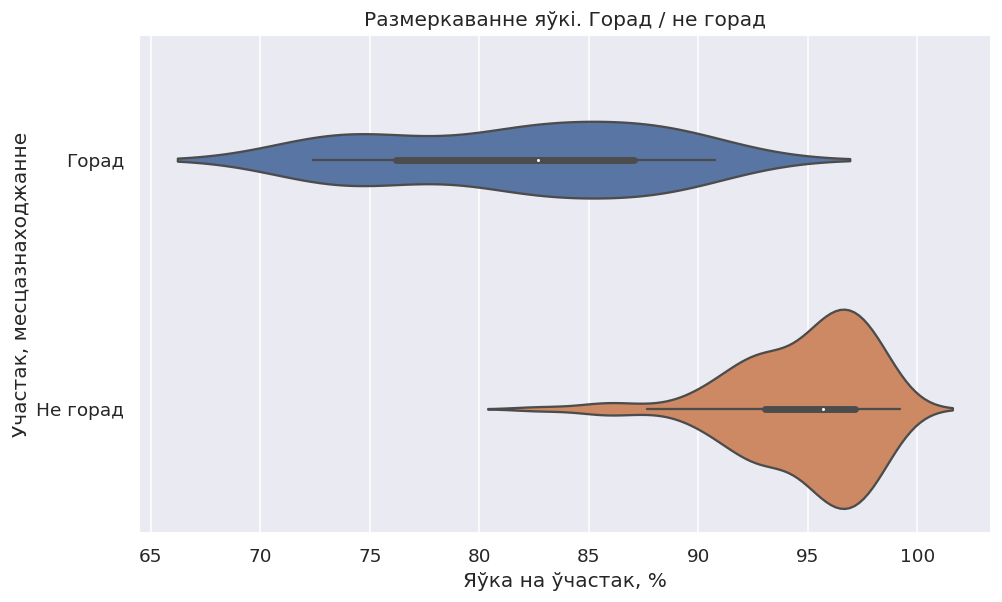

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=110)
sns.violinplot(x='voted_%', y='in_city', data=df, ax=ax)
ax.set_xlabel('Яўка на ўчастак, %')
ax.set_ylabel('Участак, месцазнаходжанне')
ax.set_title('Размеркаванне яўкі. Горад / не горад');